# Adatbeolvasás

In [1]:
# 📦 Szükséges csomagok importálása
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("Csomagok betöltve!")


Csomagok betöltve!


In [2]:
# 📂 CSV fájlok helye
csv_path = "/home/g14/sze_adatelemzes/f1/database"

# CSV fájlok beolvasása
versenyzok = pd.read_csv(f"{csv_path}/f1_dataset_versenyzok.csv")
konstruktorok = pd.read_csv(f"{csv_path}/f1_dataset_konstruktorok.csv")
helyszinek = pd.read_csv(f"{csv_path}/f1_dataset_helyszinek.csv")
autok = pd.read_csv(f"{csv_path}/f1_dataset_autok.csv")
szezonok = pd.read_csv(f"{csv_path}/f1_dataset_szezonok.csv")
futamok = pd.read_csv(f"{csv_path}/f1_dataset_futamok.csv")
helyezesek = pd.read_csv(f"{csv_path}/f1_dataset_helyezesek.csv")

print("CSV fájlok sikeresen betöltve!")


CSV fájlok sikeresen betöltve!


In [3]:
# 📊 Előnézet tetszőleges számú sorral minden táblázatból
lines = 4  # Hány soros előnézet

print("\n--- versenyzok ---")
display(versenyzok.dropna().head(lines))

print("\n--- konstruktorok ---")
display(konstruktorok.dropna().head(lines))

print("\n--- helyszinek ---")
display(helyszinek.dropna().head(lines))

print("\n--- autok ---")
display(autok.dropna().head(lines))

print("\n--- szezonok ---")
display(szezonok.dropna().head(lines))

print("\n--- futamok ---")
display(futamok.dropna().head(lines))

print("\n--- helyezesek ---")
display(helyezesek.dropna().head(lines))



--- versenyzok ---


,versenyzo_id,keresztnev,vezeteknev,orszag,beszelt_nyelv,konstruktor_id,szuletesi_datum,kod
0,1,Lewis,Hamilton,Egyesult Kiralysag,angol,1,1985-01-07,HAM
1,2,Nick,Heidfeld,Nemetorszag,nemet,2,1977-05-10,HEI
2,3,Nico,Rosberg,Nemetorszag,nemet,2,1985-06-27,ROS
3,4,Fernando,Alonso,Spanyolorszag,spanyol,164,1981-07-29,ALO



--- konstruktorok ---


,konstruktor_id,nev,csapatvezeto,orszag
0,1,McLaren,Rimsha Begum,Egyesult Kiralysag
1,2,BMW Sauber,Ainsley Vu,Nemetorszag
2,3,Williams,Kourtney Curran,Egyesult Kiralysag
3,4,Renault,Cory Adamson,Franciaorszag



--- helyszinek ---


,helyszin_id,palyanev,telepules,orszag
0,1,Albert Park Grand Prix Circuit,Melbourne,Ausztralia
1,2,Sepang International Circuit,Kuala Lumpur,Malajzia
2,3,Bahrain International Circuit,Sakhir,Bahrain
3,4,Circuit de Barcelona-Catalunya,Montmelo,Spanyolorszag



--- autok ---


,auto_id,nev,karosszeria_tervezo_id,motor_tervezo_id,teljesitmeny,tomeg
0,1,Derrington-Francis,54,215,390,323
1,2,JH23,39,215,783,340
2,3,JH25B,39,215,626,601
3,4,JH27,39,215,639,822



--- szezonok ---


,szezon_id,ev
0,1,2009
1,2,2008
2,3,2007
3,4,2006



--- futamok ---


,futam_id,szezon_id,helyszin_id,datum,ido,idojarasi_korulmeny_id
731,71,5,1,2005-03-06,14:00:00:000,2
732,72,5,2,2005-03-20,15:00:00:000,4
733,73,5,3,2005-04-03,14:30:00:000,7
734,74,5,21,2005-04-24,14:00:00:000,8



--- helyezesek ---


,helyezes_id,versenyzo_id,elert_helyezes,pole_poz,verseny_ido,szezon_id,futam_id,auto_id,konstruktor_id,korok_szama
0,1,1,1.0,0,01:34:51,2,18,1.0,1,58
1,2,2,2.0,0,01:34:57,2,18,2.0,2,58
2,3,3,3.0,1,01:34:59,2,18,3.0,3,58
3,4,4,4.0,0,01:35:08,2,18,4.0,4,58


# Adatmodell

In [4]:
# Lista a táblák neveivel és a DataFrame-ekkel
tables = {
    "versenyzok": versenyzok,
    "konstruktorok": konstruktorok,
    "helyszinek": helyszinek,
    "autok": autok,
    "szezonok": szezonok,
    "futamok": futamok,
    "helyezesek": helyezesek
}

# Minden táblában az "id"-t tartalmazó oszlopok keresése
for name, df in tables.items():
    id_columns = [col for col in df.columns if "id" in col.lower()]
    print(f"\n--- {name} ---")
    if id_columns:
        print("ID-t tartalmazó oszlopok:", id_columns)
    else:
        print("Nincs ID-t tartalmazó oszlop.")



--- versenyzok ---
ID-t tartalmazó oszlopok: ['versenyzo_id', 'konstruktor_id']

--- konstruktorok ---
ID-t tartalmazó oszlopok: ['konstruktor_id']

--- helyszinek ---
ID-t tartalmazó oszlopok: ['helyszin_id']

--- autok ---
ID-t tartalmazó oszlopok: ['auto_id', 'karosszeria_tervezo_id', 'motor_tervezo_id']

--- szezonok ---
ID-t tartalmazó oszlopok: ['szezon_id']

--- futamok ---
ID-t tartalmazó oszlopok: ['futam_id', 'szezon_id', 'helyszin_id', 'ido', 'idojarasi_korulmeny_id']

--- helyezesek ---
ID-t tartalmazó oszlopok: ['helyezes_id', 'versenyzo_id', 'verseny_ido', 'szezon_id', 'futam_id', 'auto_id', 'konstruktor_id']


In [5]:
# Létrehozunk egy üres dictionary-t, ami később az ID-oszlopokat fogja táblákhoz rendelni
id_to_tables = {}

# Végigiterálunk minden táblán a "tables" dictionary-ben
for name, df in tables.items():
    # Végigiterálunk az aktuális DataFrame összes oszlopán
    for col in df.columns:
        # Ha az oszlop neve tartalmazza az "id" szót (kis- és nagybetűtől függetlenül)
        if "id" in col.lower():
            # Hozzáadjuk a dictionary-hez:
            # kulcs: az oszlop neve kisbetűsen
            # érték: a táblák listája, amelyek tartalmazzák ezt az oszlopot
            # setdefault biztosítja, hogy ha még nincs kulcs, létrehozza az üres listát
            id_to_tables.setdefault(col.lower(), []).append(name)

# Most megnézzük, hogy melyik tábla mely más táblához kapcsolható ID-oszlop alapján
for table_name, df in tables.items():
    # Kiírjuk a táblanevet a kapcsolatok listázásához
    print(f"\n--- {table_name} tábla kapcsolatai ---")
    # Flag, ami jelzi, ha találtunk kapcsolódást
    found = False
    # Végigiterálunk az aktuális tábla összes oszlopán
    for col in df.columns:
        # Csak az "id" oszlopokat vizsgáljuk
        if "id" in col.lower():
            # Kisbetűsítjük az oszlop nevét, hogy a keresés egységes legyen
            col_lower = col.lower()
            # Kikeressük, mely táblákban található még ez az ID-oszlop
            # Kizárjuk a saját táblát (önmagához nem kapcsolódik)
            related_tables = [t for t in id_to_tables.get(col_lower, []) if t != table_name]
            # Ha van legalább egy kapcsolódó tábla
            if related_tables:
                # Kiírjuk az oszlop nevét és a kapcsolódó táblákat
                print(f"{col} kapcsolható: {', '.join(related_tables)}")
                # Jelöljük, hogy találtunk kapcsolatot
                found = True
    # Ha egyetlen ID-oszlop sem kapcsolódik más táblához
    if not found:
        print("Nincs kapcsolódó tábla.")



--- versenyzok tábla kapcsolatai ---
versenyzo_id kapcsolható: helyezesek
konstruktor_id kapcsolható: konstruktorok, helyezesek

--- konstruktorok tábla kapcsolatai ---
konstruktor_id kapcsolható: versenyzok, helyezesek

--- helyszinek tábla kapcsolatai ---
helyszin_id kapcsolható: futamok

--- autok tábla kapcsolatai ---
auto_id kapcsolható: helyezesek

--- szezonok tábla kapcsolatai ---
szezon_id kapcsolható: futamok, helyezesek

--- futamok tábla kapcsolatai ---
futam_id kapcsolható: helyezesek
szezon_id kapcsolható: szezonok, helyezesek
helyszin_id kapcsolható: helyszinek

--- helyezesek tábla kapcsolatai ---
versenyzo_id kapcsolható: versenyzok
szezon_id kapcsolható: szezonok, futamok
futam_id kapcsolható: futamok
auto_id kapcsolható: autok
konstruktor_id kapcsolható: versenyzok, konstruktorok


# Típuskonverziók

In [6]:
# 🔄 Adattípus konverziók

#  A 'szuletesi_datum' oszlopot datetime típusra konvertáljuk.
#  Ha az érték nem konvertálható, NaT lesz (errors="coerce").
versenyzok["szuletesi_datum"] = pd.to_datetime(
    versenyzok["szuletesi_datum"], errors="coerce"
)

#  A 'datum' oszlopot datetime típusú dátummá konvertáljuk.
#  Csak a dátumot tartjuk meg (.dt.date), az időt eldobjuk.
futamok["datum"] = pd.to_datetime(futamok["datum"], errors="coerce").dt.date

#  Az 'ido' oszlopot datetime típusú idővé konvertáljuk a "%H:%M:%S" formátum szerint.
#  Csak az időt tartjuk meg (.dt.time).
futamok["ido"] = pd.to_datetime(
    futamok["ido"], format="%H:%M:%S", errors="coerce"
).dt.time

#  A 'ev' oszlopot datetime formátumra konvertáljuk, csak az év alapján.
#  Ha csak az év szerepel, január 1. lesz automatikusan hozzárendelve.
szezonok["ev"] = pd.to_datetime(
    szezonok["ev"], format="%Y", errors="coerce"
)

#  A 'verseny_ido' oszlopot datetime típusú idővé konvertáljuk a "%H:%M:%S" formátum szerint.
#  Csak az időt tartjuk meg (.dt.time).
helyezesek["verseny_ido"] = pd.to_datetime(
    helyezesek["verseny_ido"], format="%H:%M:%S", errors="coerce"
).dt.time

# Kiírás a felhasználónak, hogy minden konverzió sikeresen végrehajtva
print("Adattípus konverziók sikeresen végrehajtva!")

# Futamok - legelső és legutolsó dátum
print("Futamok legelső dátuma:", futamok["datum"].min())
print("Futamok legutolsó dátuma:", futamok["datum"].max())

# Versenyzők születési dátuma - legelső és legutolsó
print("Versenyzők legkorábbi születési dátuma:", versenyzok["szuletesi_datum"].min())
print("Versenyzők legkésőbbi születési dátuma:", versenyzok["szuletesi_datum"].max())


Adattípus konverziók sikeresen végrehajtva!
Futamok legelső dátuma: 1950-05-13
Futamok legutolsó dátuma: 2022-11-20
Versenyzők legkorábbi születési dátuma: 1896-12-28 00:00:00
Versenyzők legkésőbbi születési dátuma: 2000-05-11 00:00:00


# Formátum ellenőrzés

In [7]:
# ✅ Ellenőrzés: adattípusok megtekintése
print("Versenyzők:\n", versenyzok.dtypes, "\n")
print("Futamok:\n", futamok.dtypes, "\n")
print("Szezonok:\n", szezonok.dtypes, "\n")
print("Helyezések:\n", helyezesek.dtypes, "\n")


Versenyzők:
 versenyzo_id                int64
keresztnev                 object
vezeteknev                 object
orszag                     object
beszelt_nyelv              object
konstruktor_id              int64
szuletesi_datum    datetime64[ns]
kod                        object
dtype: object 

Futamok:
 futam_id                           int64
szezon_id                          int64
helyszin_id                        int64
datum                             object
ido                       datetime64[ns]
idojarasi_korulmeny_id             int64
dtype: object 

Szezonok:
 szezon_id             int64
ev           datetime64[ns]
dtype: object 

Helyezések:
 helyezes_id         int64
versenyzo_id        int64
elert_helyezes    float64
pole_poz            int64
verseny_ido        object
szezon_id           int64
futam_id            int64
auto_id           float64
konstruktor_id      int64
korok_szama         int64
dtype: object 



# Statisztikai jellemzők

In [8]:
# Listázunk minden DataFrame-et egy szótárban
dfs = {
    "versenyzok": versenyzok,
    "konstruktorok": konstruktorok,
    "helyszinek": helyszinek,
    "autok": autok,
    "szezonok": szezonok,
    "futamok": futamok,
    "helyezesek": helyezesek
}

# Minden DataFrame statisztikai jellemzőinek kiíratása
for name, df in dfs.items():
    print(f"Tábla neve: {name}")
    print(f"Sorok és oszlopok: {df.shape}")
    print("\n")

Tábla neve: versenyzok
Sorok és oszlopok: (854, 8)


Tábla neve: konstruktorok
Sorok és oszlopok: (212, 4)


Tábla neve: helyszinek
Sorok és oszlopok: (76, 4)


Tábla neve: autok
Sorok és oszlopok: (565, 6)


Tábla neve: szezonok
Sorok és oszlopok: (73, 2)


Tábla neve: futamok
Sorok és oszlopok: (1079, 6)


Tábla neve: helyezesek
Sorok és oszlopok: (25660, 10)




# Lekérdezések

## 1. Listázza ki azokat a pilótákat, akik pole pozícióból kerültek dobogós helyre a 2019-es szezonban!

In [9]:
# Merge: helyezesek + szezonok (2019-re szűrés)
merged = helyezesek.merge(szezonok, on="szezon_id")

# Oszlopok ellenőrzése
#print(merged.columns.tolist())

# Szűrés: 2019, dobogó, pole
filtered = merged[
    (merged["ev"].dt.year == 2019) &   # szezon 2019
    (merged["elert_helyezes"] <= 3) &  # dobogó
    (merged["pole_poz"] == 1)          # pole pozíció
]

# Merge (összekapcsolás) a 'filtered' DataFrame és a 'versenyzok' DataFrame között
# a 'versenyzo_id' oszlop alapján, hogy megkapjuk a versenyzők nevét
result = filtered.merge(versenyzok, on="versenyzo_id")

# Új oszlop létrehozása 'Nev' néven, ahol a kereszt- és vezetéknév össze van fűzve
result["Nev"] = result["keresztnev"] + " " + result["vezeteknev"]

# Csak a különböző neveket hagyjuk meg (DISTINCT)
# A reset_index(drop=True) eltávolítja a régi indexet, újrakezdi 0-tól
pilota_lista = result["Nev"].drop_duplicates().reset_index(drop=True)

# 4. Az eredmény megjelenítése
display(pilota_lista)



0      Max Verstappen
1     Charles Leclerc
2    Sebastian Vettel
3      Lewis Hamilton
4     Valtteri Bottas
Name: Nev, dtype: object

## 2. Listázza ki azon autókat, melyeknek teljesítménye 700 és 800 kW közé esik!


In [10]:
# Győződjünk meg róla, hogy a teljesítmény numerikus
autok["teljesitmeny"] = pd.to_numeric(autok["teljesitmeny"], errors="coerce")

# Szűrés: teljesítmény 700–800 kW
filtered_autok = autok[(autok["teljesitmeny"] >= 700) & (autok["teljesitmeny"] <= 800)]

# Csak az oszlopok, amik érdekelnek, és rendezés csökkenő sorrendben
result = (
    # Kiválasztjuk a 'nev' és 'teljesitmeny' oszlopokat a 'filtered_autok' DataFrame-ből
    filtered_autok[["nev", "teljesitmeny"]]
    
    # Sorba rendezzük a DataFrame-et a 'teljesitmeny' oszlop szerint csökkenő sorrendben
    .sort_values(by="teljesitmeny", ascending=False)
    
    # Újraindexeljük a DataFrame-et 0-tól kezdődő sorszámozással, a régi indexet eldobva
    .reset_index(drop=True)
)

display(result)


,nev,teljesitmeny
0,T16,798
1,D2,797
2,RS01,795
3,1,795
4,RB14,795
...,...,...
93,VJM08B,702
94,PC3,702
95,21,701
96,FW28B,701


## 3. Ki volt a legeredményesebb konstruktőr csapatfőnöke a 2003 és 2007 közötti versenyszezonok intervallumában?

In [11]:
# Győződjünk meg róla, hogy az 'ev' oszlop datetime
szezonok["ev"] = pd.to_datetime(szezonok["ev"], errors="coerce")

# Merge helyezesek + szezonok
merged = helyezesek.merge(szezonok, on="szezon_id")

# Oszlopok ellenőrzése
#print(merged.columns.tolist())

# Szűrés: 2003-2007 közötti szezonok és első helyezés
filtered = merged[
    (merged["ev"].dt.year >= 2003) &
    (merged["ev"].dt.year <= 2007) &
    (merged["elert_helyezes"] == 1)
]

# Merge konstruktorok a csapatvezető nevéhez
merged_final = filtered.merge(
    konstruktorok[["konstruktor_id", "csapatvezeto"]],
    on="konstruktor_id"
)

# Csoportosítás és számolás
result = (
    # Csoportosítás a 'merged_final' DataFrame-ben a 'csapatvezeto' oszlop szerint
    # Ez a konstruktor csapatfőnök neve
    merged_final.groupby("csapatvezeto")["elert_helyezes"]
    
    # Megszámolja az egyes csapatfőnökökhöz tartozó sorok számát,
    # vagyis hány versenyt nyertek (minden első helyezés)
    .count()
    
    # Az eredményt átalakítjuk DataFrame-é, és az új oszlopot 'db'-nek nevezzük
    .reset_index(name="db")
    
    # Csökkenő sorrendbe rendezzük a győzelmek számát
    .sort_values(by="db", ascending=False)
    
    # Csak az első sort tartjuk meg, ami a legeredményesebb csapatfőnök
    .head(1)
)

# Megjelenítjük az eredményt
display(result)



,csapatvezeto,db
4,Thea Beach,42


## 4. A Nürburgringen a 20. században hány különböző konstruktőr vonultatta fel a versenyautóit?


In [12]:
# Csak az év kinyerése a szezonokból
szezonok['ev'] = pd.to_datetime(szezonok['ev'], errors='coerce').dt.year

# 20. századi szezonok szűrése
szezonok_20_szazad = szezonok[(szezonok['ev'] >= 1900) & (szezonok['ev'] <= 1999)]

# Nürburgring helyszín kiválasztása
nurburgring = helyszinek[helyszinek['palyanev'].str.contains('Nurburgring', case=False, na=False)]

# Futamok szűrése Nürburgringen és 20. században
futamok_nurburgring = futamok[
    (futamok['helyszin_id'].isin(nurburgring['helyszin_id'])) &
    (futamok['szezon_id'].isin(szezonok_20_szazad['szezon_id']))
]

# Helyezések összekapcsolása autókkal
helyezesek_autok = helyezesek.merge(autok, on='auto_id', how='left')

# Csak a szűrt futamok helyezései
helyezesek_nurburgring = helyezesek_autok.merge(
    futamok_nurburgring[['futam_id', 'helyszin_id']],
    on='futam_id',
    how='inner'
)

# Konstruktőrök nevét átnevezzük merge előtt
konstruktorok = konstruktorok.rename(columns={'nev': 'konstruktor_nev'})

# Merge konstruktőrökkel
helyezesek_konstruktorok = helyezesek_nurburgring.merge(
    konstruktorok[['konstruktor_id', 'konstruktor_nev']],
    left_on='karosszeria_tervezo_id',
    right_on='konstruktor_id',
    how='left'
)

# Egyedi konstruktőrök száma helyszín szerint
result = (
    helyezesek_konstruktorok.groupby('helyszin_id')['konstruktor_nev']
    .nunique()
    .reset_index(name='db')
)

# Helyszín nevének visszacsatolása
result = result.merge(
    nurburgring[['helyszin_id', 'palyanev']],
    on='helyszin_id',
    how='left'
)[['palyanev', 'db']]

# Eredmény megjelenítése
display(result)


,palyanev,db
0,Nurburgring,18


## 5. Melyik 5, a konstruktőrök alapítási helye szerinti ország rendelkezik a legtöbb győzelemmel?


In [13]:
# Szűrés: csak az 1. helyezések
wins = helyezesek[helyezesek["elert_helyezes"] == 1]

# Merge a konstruktorokkal, hogy megkapjuk az országot
merged = wins.merge(konstruktorok[["konstruktor_id", "orszag"]], on="konstruktor_id")

# Oszlopok ellenőrzése
#print(merged.columns.tolist())

# Győzelmek száma országonként
result = (
    # Csoportosítjuk a 'merged' DataFrame-et az 'orszag' oszlop szerint
    merged.groupby("orszag")
    
    # Minden csoportban megszámoljuk a sorok számát (itt ez a győzelmek száma)
    .size()
    
    # Átalakítjuk DataFrame-é, és az új oszlopot elnevezzük 'Gyozelmek_szama'-nak
    .reset_index(name="Gyozelmek_szama")
    
    # Csökkenő sorrendbe rendezzük a győzelmek száma szerint
    .sort_values("Gyozelmek_szama", ascending=False)
    
    # Csak az első 5 sort tartjuk meg (legtöbb győzelem)
    .head(5)
)

# Eredmény megjelenítése
display(result)


,orszag,Gyozelmek_szama
2,Egyesult Kiralysag,494
8,Olaszorszag,281
7,Nemetorszag,126
0,Ausztria,84
3,Franciaorszag,54


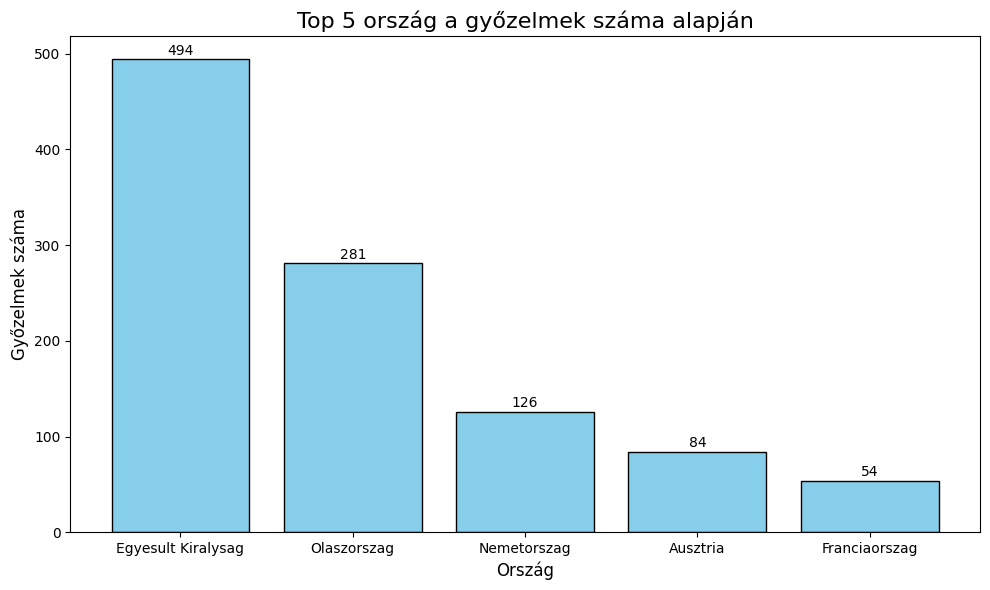

In [14]:
# Adatok kiválasztása a diagramhoz
countries = result["orszag"]          # Az országneveket tartalmazó oszlopot választjuk ki az x-tengelyhez
wins = result["Gyozelmek_szama"]      # A győzelmek számát tartalmazó oszlopot választjuk ki az y-tengelyhez

# Figure (ábra) létrehozása
plt.figure(figsize=(10,6))  # Új ábra létrehozása

# Oszlopdiagram készítése
plt.bar(
    countries,                # x-tengely: országok
    wins,                     # y-tengely: győzelmek száma
    color='skyblue',          # Oszlopok belső színe világoskék
    edgecolor='black'         # Oszlopok szélét fekete színnel rajzoljuk ki
)

# Diagram címe és tengelyfeliratok
plt.title("Top 5 ország a győzelmek száma alapján", fontsize=16)  # Diagram főcíme
plt.xlabel("Ország", fontsize=12) # x-tengely felirat
plt.ylabel("Győzelmek száma", fontsize=12) # y-tengely felirat

# Az oszlopok tetejére kiírjuk a győzelmek számát
for i, v in enumerate(wins): # Végigmegyünk az összes győzelmi értéken, i az index, v az érték
    plt.text(
        i, # x-koordináta (oszlop helye)
        v + 5, # y-koordináta (oszlop teteje + 5 egység, hogy ne lógjon rá)
        str(v), # Kiírandó szöveg, az érték karakterként
        ha='center', # Középre igazítás
        fontsize=10 # Szöveg betűmérete
    )

# Diagram megjelenítése
plt.tight_layout()   # Automatikusan beállítja a margókat, hogy a címek és feliratok ne legyenek levágva
plt.show()           # Megjeleníti a diagramot
